In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
plt.style.use("seaborn-pastel")

In [4]:
df_ratings=pd.read_csv('Dataset/title_ratings_data.tsv', sep='\t')

In [5]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200773 entries, 0 to 1200772
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1200773 non-null  object 
 1   averageRating  1200773 non-null  float64
 2   numVotes       1200773 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 27.5+ MB


**Mean and median of Rating,Number of Votes**

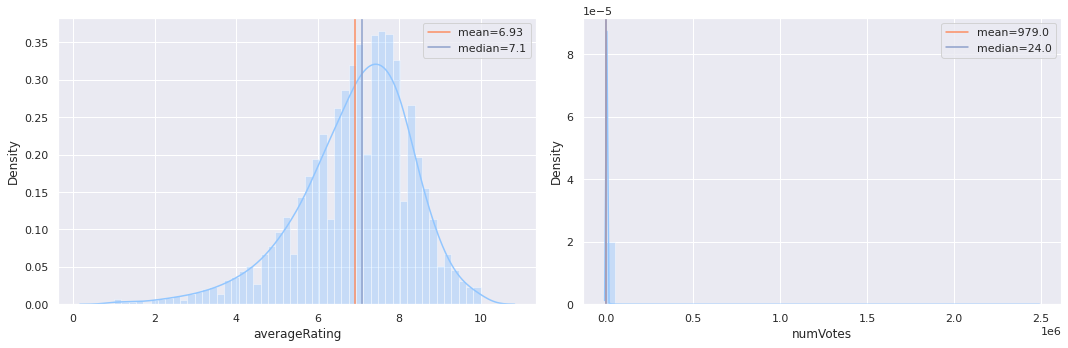

In [6]:
ratings=dict(mean=df_ratings.averageRating.mean(),median=df_ratings.averageRating.median())
votes=dict(mean=df_ratings.numVotes.mean(),median=df_ratings.numVotes.median())

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1=sns.distplot(df_ratings.averageRating,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings['mean'],c=sns.color_palette("Set2")[1],label=f"mean={round(ratings['mean'],2)}")
ax1.axvline(x=ratings['median'],c=sns.color_palette("Set2")[2],label=f"median={round(ratings['median'],2)}")
plt.legend()

plt.subplot(1,2,2)
ax2=sns.distplot(df_ratings.numVotes,kde_kws=dict(bw=0.2))
ax2.axvline(x=ratings['mean'],c=sns.color_palette("Set2")[1],label=f"mean={round(votes['mean'],2)}")
ax2.axvline(x=ratings['median'],c=sns.color_palette("Set2")[2],label=f"median={round(votes['median'],2)}")
plt.legend()

plt.tight_layout()
plt.show()

Plotting it on log scale

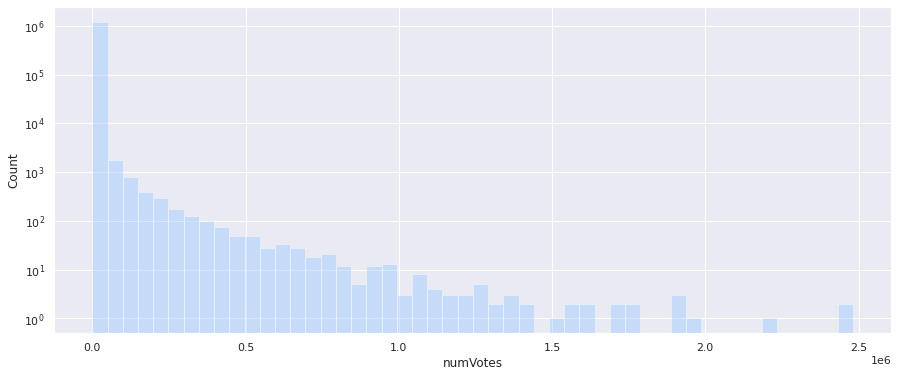

In [7]:
plt.figure(figsize=(15,6))
ax=sns.distplot(df_ratings.numVotes,kde=False)
ax.set_ylabel("Count")
ax.set_yscale("log")

In [8]:
df_basics=pd.read_csv('Dataset/title_basics_data.tsv', sep='\t')

In [9]:
df_basics.replace('\\N',np.nan,inplace=True)

In [10]:
df_basics.shape

(8411470, 9)

In [11]:
df_basics.isnull().sum()

tconst                  0
titleType               0
primaryTitle            9
originalTitle           9
isAdult                 1
startYear         1023380
endYear           8327713
runtimeMinutes    6050213
genres             641953
dtype: int64

In [12]:
# most of the values in endYear is null, so dropping it

df_basics=df_basics.drop(["endYear"],axis=1)

In [13]:
df_basics.isnull().sum()

tconst                  0
titleType               0
primaryTitle            9
originalTitle           9
isAdult                 1
startYear         1023380
runtimeMinutes    6050213
genres             641953
dtype: int64

In [14]:
df_basics=df_basics.dropna(axis=0, subset=['genres'])

In [15]:
df_basics=df_basics.dropna(axis=0, subset=['isAdult'])

In [16]:
df_basics.shape

(7769517, 8)

Distribution of IMDb dataset on titleType

In [17]:
pd.DataFrame(df_basics.titleType)['titleType'].value_counts()

tvEpisode       5664946
short            840379
movie            522169
video            319678
tvSeries         197650
tvMovie          122099
tvMiniSeries      37800
tvSpecial         29664
videoGame         24781
tvShort           10351
Name: titleType, dtype: int64

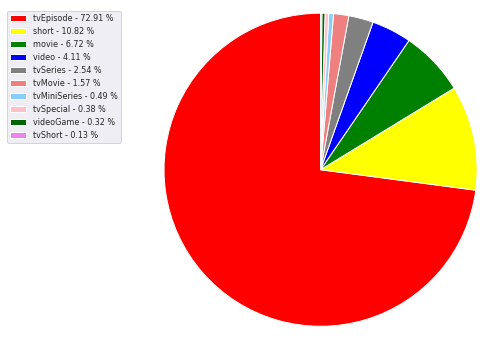

In [18]:
x = np.char.array(['tvEpisode','short','movie','video','tvSeries','tvMovie','tvMiniSeries','tvSpecial','videoGame','tvShort'])
y = np.array([5664946,840379,522169,319678,197650,122099,37800,29664,24781,10351])
colors = ['red','yellow','green','blue','grey','lightcoral','lightskyblue','pink', 'darkgreen','violet']
porcent = 100.*y/y.sum()
plt.figure(figsize=(6,6))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2],reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=8)
plt.show()

Filtering movies data 

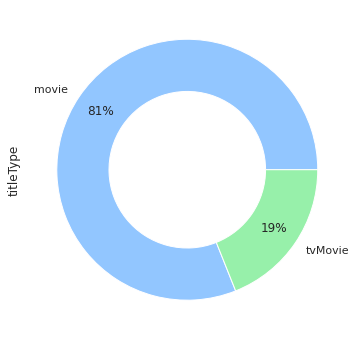

In [19]:
df_basics_movies=df_basics[(df_basics.titleType=="movie") | (df_basics.titleType=="tvMovie")]
df_basics_movies.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

Analysing percentage of adult movies in dataset

In [20]:
df_basics_movies['isAdult']=df_basics_movies['isAdult'].astype(int)

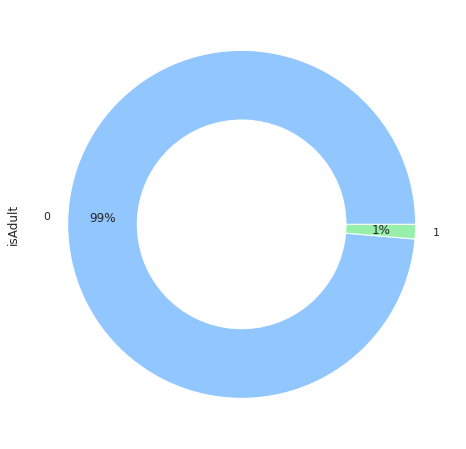

In [21]:
df_basics_movies['isAdult'].value_counts().plot.pie(autopct="%.0f%%",figsize=(12,8),pctdistance=0.8,wedgeprops=dict(width=0.4))

In [22]:
df_basics_movies['genres'].value_counts().head(10)

Drama             132459
Documentary       118793
Comedy             58114
Horror             14795
Thriller           14629
Action             14249
Comedy,Drama       13948
Drama,Romance      13090
Romance             7696
Comedy,Romance      7488
Name: genres, dtype: int64

Analysisng combinations of genres in dataset

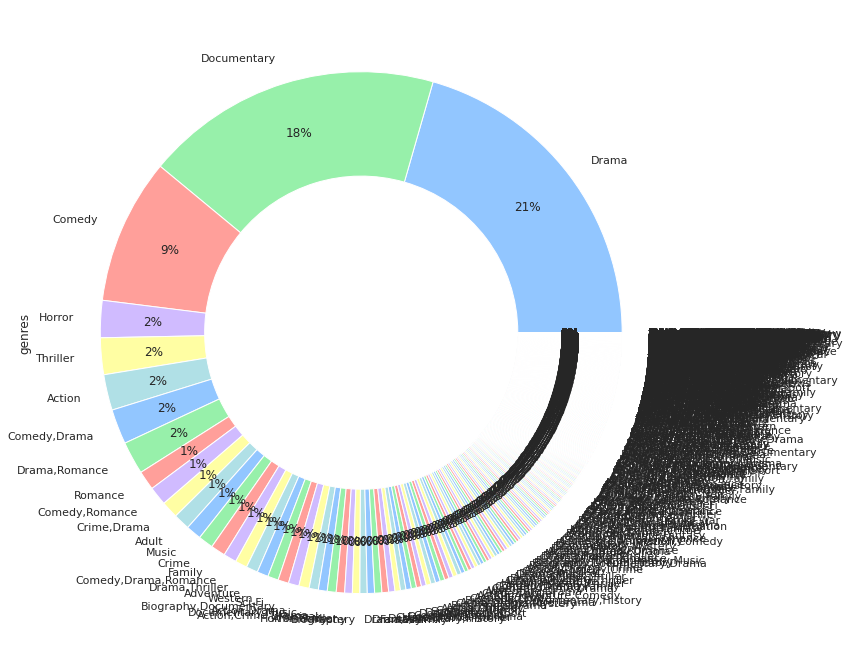

In [23]:
df_basics_movies.genres.value_counts().plot.pie(autopct="%.0f%%",figsize=(18,12),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

In [24]:
df_basics_movies.shape

(644268, 8)

In [25]:
df_movies=pd.merge(df_basics_movies,df_ratings,on=["tconst"])

In [26]:
df_movies.isnull().sum()

tconst                0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear            27
runtimeMinutes    30118
genres                0
averageRating         0
numVotes              0
dtype: int64

In [27]:
df_movies.groupby('genres')[['averageRating']].mean().sort_values(by='averageRating',ascending=False).head(10)

,averageRating
genres,
"Action,History,Musical",8.9
"Documentary,News,Reality-TV",8.9
"Musical,Sport",8.7
"Documentary,Mystery,News",8.7
"Fantasy,Musical,Mystery",8.6
"Family,News",8.6
"Family,Music,Western",8.6
"Documentary,Musical,Thriller",8.5
"Fantasy,Music,Mystery",8.4


Different genres and total count of movies genre wise

In [28]:
l=[]
for x in df_movies['genres']:
   l.append(x.split(','))

In [29]:
genrelist=[]
for x in l:
   for y in x:
      genrelist.append(y)

In [30]:
uniquegenre=[]
for x in genrelist:
  if x not in uniquegenre:
     uniquegenre.append(x)
print("The number of unique genres is: %d" %len(uniquegenre))    

The number of unique genres is: 28


In [31]:
from collections import Counter
d=Counter(genrelist)

In [36]:
d

Counter({'Action': 30479,
         'Adult': 4164,
         'Adventure': 19142,
         'Animation': 5977,
         'Biography': 10399,
         'Comedy': 77033,
         'Crime': 26672,
         'Documentary': 53067,
         'Drama': 137496,
         'Family': 12937,
         'Fantasy': 9276,
         'Film-Noir': 761,
         'Game-Show': 7,
         'History': 9286,
         'Horror': 20074,
         'Music': 8531,
         'Musical': 6795,
         'Mystery': 11543,
         'News': 689,
         'Reality-TV': 118,
         'Romance': 33760,
         'Sci-Fi': 7394,
         'Short': 25,
         'Sport': 3817,
         'Talk-Show': 22,
         'Thriller': 25067,
         'War': 6538,
         'Western': 4886})

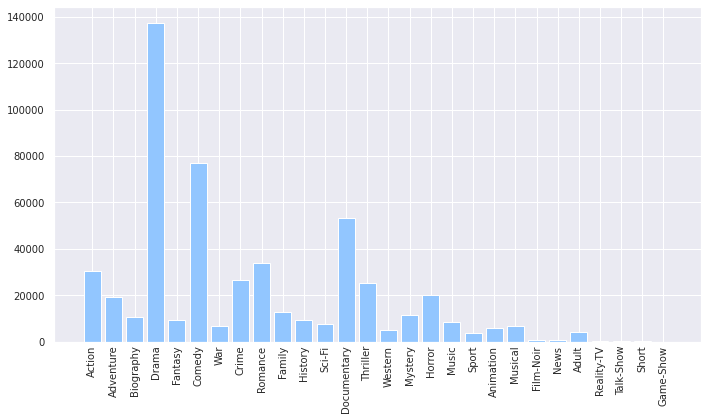

In [35]:
fig,x=plt.subplots(figsize=(10,6))
plt.bar(d.keys(), d.values())
plt.setp(x.get_xticklabels(), rotation=90)
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

Finding region wise data count

In [44]:
df_akas=pd.read_csv('Dataset/title_akas_data.tsv', sep='\t')

In [45]:
df_akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
29761186,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
29761187,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
29761188,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
29761189,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [46]:
df_akas.replace('\\N',np.nan,inplace=True)

In [49]:
Country_Code_mapping={
 'AD': 'Andorra',
 'AE': 'United Arab Emirates',
 'AF': 'Afghanistan',
 'AG': 'Antigua and Barbuda',
 'AI': 'Anguilla',
 'AL': 'Albania',
 'AM': 'Armenia',
 'AO': 'Angola',
 'AQ': 'Antarctica',
 'AR': 'Argentina',
 'AS': 'American Samoa',
 'AT': 'Austria',
 'AU': 'Australia',
 'AW': 'Aruba',
 'AX': 'Åland Islands',
 'AZ': 'Azerbaijan',
 'BA': 'Bosnia and Herzegovina',
 'BB': 'Barbados',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BJ': 'Benin',
 'BL': 'Saint Barthélemy',
 'BM': 'Bermuda',
 'BN': 'Brunei Darussalam',
 'BO': 'Bolivia, Plurinational State of',
 'BQ': 'Bonaire, Sint Eustatius and Saba',
 'BR': 'Brazil',
 'BS': 'Bahamas',
 'BT': 'Bhutan',
 'BV': 'Bouvet Island',
 'BW': 'Botswana',
 'BY': 'Belarus',
 'BZ': 'Belize',
 'CA': 'Canada',
 'CC': 'Cocos (Keeling) Islands',
 'CD': 'Congo, the Democratic Republic of the',
 'CF': 'Central African Republic',
 'CG': 'Congo',
 'CH': 'Switzerland',
 'CI': "Côte d'Ivoire",
 'CK': 'Cook Islands',
 'CL': 'Chile',
 'CM': 'Cameroon',
 'CN': 'China',
 'CO': 'Colombia',
 'CR': 'Costa Rica',
 'CU': 'Cuba',
 'CV': 'Cape Verde',
 'CW': 'Curaçao',
 'CX': 'Christmas Island',
 'CY': 'Cyprus',
 'CZ': 'Czech Republic',
 'Code': 'Country name',
 'DE': 'Germany',
 'DJ': 'Djibouti',
 'DK': 'Denmark',
 'DM': 'Dominica',
 'DO': 'Dominican Republic',
 'DZ': 'Algeria',
 'EC': 'Ecuador',
 'EE': 'Estonia',
 'EG': 'Egypt',
 'EH': 'Western Sahara',
 'ER': 'Eritrea',
 'ES': 'Spain',
 'ET': 'Ethiopia',
 'FI': 'Finland',
 'FJ': 'Fiji',
 'FK': 'Falkland Islands (Malvinas)',
 'FM': 'Micronesia, Federated States of',
 'FO': 'Faroe Islands',
 'FR': 'France',
 'GA': 'Gabon',
 'GB': 'United Kingdom',
 'GD': 'Grenada',
 'GE': 'Georgia',
 'GF': 'French Guiana',
 'GG': 'Guernsey',
 'GH': 'Ghana',
 'GI': 'Gibraltar',
 'GL': 'Greenland',
 'GM': 'Gambia',
 'GN': 'Guinea',
 'GP': 'Guadeloupe',
 'GQ': 'Equatorial Guinea',
 'GR': 'Greece',
 'GS': 'South Georgia and the South Sandwich Islands',
 'GT': 'Guatemala',
 'GU': 'Guam',
 'GW': 'Guinea-Bissau',
 'GY': 'Guyana',
 'HK': 'Hong Kong',
 'HM': 'Heard Island and McDonald Islands',
 'HN': 'Honduras',
 'HR': 'Croatia',
 'HT': 'Haiti',
 'HU': 'Hungary',
 'ID': 'Indonesia',
 'IE': 'Ireland',
 'IL': 'Israel',
 'IM': 'Isle of Man',
 'IN': 'India',
 'IO': 'British Indian Ocean Territory',
 'IQ': 'Iraq',
 'IR': 'Iran, Islamic Republic of',
 'IS': 'Iceland',
 'IT': 'Italy',
 'JE': 'Jersey',
 'JM': 'Jamaica',
 'JO': 'Jordan',
 'JP': 'Japan',
 'KE': 'Kenya',
 'KG': 'Kyrgyzstan',
 'KH': 'Cambodia',
 'KI': 'Kiribati',
 'KM': 'Comoros',
 'KN': 'Saint Kitts and Nevis',
 'KP': "Korea, Democratic People's Republic of",
 'KR': 'Korea, Republic of',
 'KW': 'Kuwait',
 'KY': 'Cayman Islands',
 'KZ': 'Kazakhstan',
 'LA': "Lao People's Democratic Republic",
 'LB': 'Lebanon',
 'LC': 'Saint Lucia',
 'LI': 'Liechtenstein',
 'LK': 'Sri Lanka',
 'LR': 'Liberia',
 'LS': 'Lesotho',
 'LT': 'Lithuania',
 'LU': 'Luxembourg',
 'LV': 'Latvia',
 'LY': 'Libya',
 'MA': 'Morocco',
 'MC': 'Monaco',
 'MD': 'Moldova, Republic of',
 'ME': 'Montenegro',
 'MF': 'Saint Martin (French part)',
 'MG': 'Madagascar',
 'MH': 'Marshall Islands',
 'MK': 'Macedonia, the former Yugoslav Republic of',
 'ML': 'Mali',
 'MM': 'Myanmar',
 'MN': 'Mongolia',
 'MO': 'Macao',
 'MP': 'Northern Mariana Islands',
 'MQ': 'Martinique',
 'MR': 'Mauritania',
 'MS': 'Montserrat',
 'MT': 'Malta',
 'MU': 'Mauritius',
 'MV': 'Maldives',
 'MW': 'Malawi',
 'MX': 'Mexico',
 'MY': 'Malaysia',
 'MZ': 'Mozambique',
 'NA': 'Namibia',
 'NC': 'New Caledonia',
 'NE': 'Niger',
 'NF': 'Norfolk Island',
 'NG': 'Nigeria',
 'NI': 'Nicaragua',
 'NL': 'Netherlands',
 'NO': 'Norway',
 'NP': 'Nepal',
 'NR': 'Nauru',
 'NU': 'Niue',
 'NZ': 'New Zealand',
 'OM': 'Oman',
 'PA': 'Panama',
 'PE': 'Peru',
 'PF': 'French Polynesia',
 'PG': 'Papua New Guinea',
 'PH': 'Philippines',
 'PK': 'Pakistan',
 'PL': 'Poland',
 'PM': 'Saint Pierre and Miquelon',
 'PN': 'Pitcairn',
 'PR': 'Puerto Rico',
 'PS': 'Palestine, State of',
 'PT': 'Portugal',
 'PW': 'Palau',
 'PY': 'Paraguay',
 'QA': 'Qatar',
 'RE': 'Réunion',
 'RO': 'Romania',
 'RS': 'Serbia',
 'RU': 'Russian Federation',
 'RW': 'Rwanda',
 'SA': 'Saudi Arabia',
 'SB': 'Solomon Islands',
 'SC': 'Seychelles',
 'SD': 'Sudan',
 'SE': 'Sweden',
 'SG': 'Singapore',
 'SH': 'Saint Helena, Ascension and Tristan da Cunha',
 'SI': 'Slovenia',
 'SJ': 'Svalbard and Jan Mayen',
 'SK': 'Slovakia',
 'SL': 'Sierra Leone',
 'SM': 'San Marino',
 'SN': 'Senegal',
 'SO': 'Somalia',
 'SR': 'Suriname',
 'SS': 'South Sudan',
 'ST': 'Sao Tome and Principe',
 'SV': 'El Salvador',
 'SX': 'Sint Maarten (Dutch part)',
 'SY': 'Syrian Arab Republic',
 'SZ': 'Swaziland',
 'TC': 'Turks and Caicos Islands',
 'TD': 'Chad',
 'TF': 'French Southern Territories',
 'TG': 'Togo',
 'TH': 'Thailand',
 'TJ': 'Tajikistan',
 'TK': 'Tokelau',
 'TL': 'Timor-Leste',
 'TM': 'Turkmenistan',
 'TN': 'Tunisia',
 'TO': 'Tonga',
 'TR': 'Turkey',
 'TT': 'Trinidad and Tobago',
 'TV': 'Tuvalu',
 'TW': 'Taiwan, Province of China',
 'TZ': 'Tanzania, United Republic of',
 'UA': 'Ukraine',
 'UG': 'Uganda',
 'UM': 'United States Minor Outlying Islands',
 'US': 'United States',
 'UY': 'Uruguay',
 'UZ': 'Uzbekistan',
 'VA': 'Holy See (Vatican City State)',
 'VC': 'Saint Vincent and the Grenadines',
 'VE': 'Venezuela, Bolivarian Republic of',
 'VG': 'Virgin Islands, British',
 'VI': 'Virgin Islands, U.S.',
 'VN': 'Viet Nam',
 'VU': 'Vanuatu',
 'WF': 'Wallis and Futuna',
 'WS': 'Samoa',
 'YE': 'Yemen',
 'YT': 'Mayotte',
 'ZA': 'South Africa',
 'ZM': 'Zambia',
 'ZW': 'Zimbabwe'}

In [50]:
df_akas['region'] =df_akas['region'].map(Country_Code_mapping).fillna(df_akas['region'])

In [51]:
df_akas['region'].value_counts()

France                             3509168
Japan                              3504166
Germany                            3466962
Spain                              3434431
India                              3428696
                                    ...   
Nauru                                    1
Tuvalu                                   1
Palau                                    1
Niue                                     1
Micronesia, Federated States of          1
Name: region, Length: 246, dtype: int64

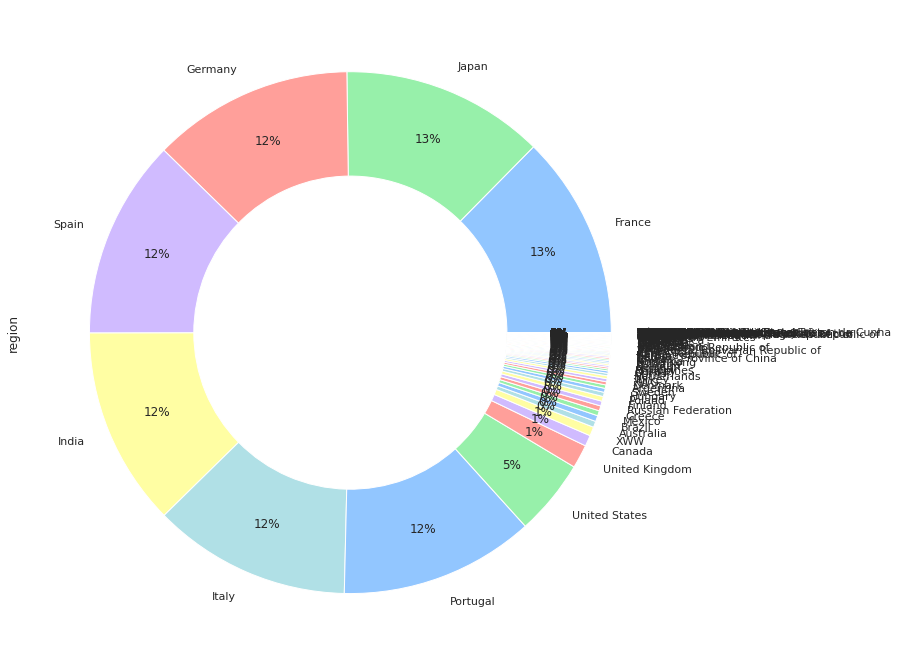

In [52]:
df_akas['region'].value_counts().plot.pie(autopct="%.0f%%",figsize=(12,12),pctdistance=0.8,wedgeprops=dict(width=0.4))
plt.show()

In [53]:
df_akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,Ukraine,NaN,imdbDisplay,NaN,0
1,tt0000001,2,Carmencita,Germany,NaN,NaN,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,Hungary,NaN,imdbDisplay,NaN,0
3,tt0000001,4,Καρμενσίτα,Greece,NaN,imdbDisplay,NaN,0
4,tt0000001,5,Карменсита,Russian Federation,NaN,imdbDisplay,NaN,0
...,...,...,...,...,...,...,...,...
29761186,tt9916852,5,Episódio #3.20,Portugal,pt,NaN,NaN,0
29761187,tt9916852,6,Episodio #3.20,Italy,it,NaN,NaN,0
29761188,tt9916852,7,एपिसोड #3.20,India,hi,NaN,NaN,0
29761189,tt9916856,1,The Wind,Germany,NaN,imdbDisplay,NaN,0
